In [86]:
import keras
import os
#import cv2 as cv2
from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np
#from os import walk
#from array import *

import matplotlib.pyplot as plt
#from build_database import build_database

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from PIL import Image, ImageOps

import pickle

In [87]:
descriptors_val = pickle.load(open("save_val.p", "rb"))

In [88]:
descriptors_train = pickle.load(open("save_train.p", "rb"))

In [89]:
imagen = pickle.load(open("save_img.p", "rb"))

In [90]:
imagen3 = pickle.load(open("save_img3.p", "rb"))

In [91]:
dic_val = pickle.load(open("save_dic_val.p", "rb"))

In [92]:
dic_train = pickle.load(open("save_dic_train.p", "rb"))

In [93]:
x_val = np.reshape(descriptors_val, (477,4096)) 

In [94]:
x_train = np.reshape(descriptors_train, (1194,4096)) 

In [95]:
x_val = sklearn.preprocessing.normalize(x_val, norm='l2', axis=1, copy=True, return_norm=False)

In [96]:
x_train = sklearn.preprocessing.normalize(x_train, norm='l2', axis=1, copy=True, return_norm=False)

In [97]:
descriptors_traint = x_train.transpose()

In [98]:
similarities=np.matmul(x_val,descriptors_traint)

In [99]:
ranks = np.argsort(similarities, axis=1)[:,::-1]

In [100]:
# get the original images for visualization
x_val_images = []
x_train_images = []

In [101]:
v = 0
for v in range(477): 
    x_val_images.append(np.array(imagen[v]))

In [102]:
b = 0
for b in range(1194): 
    x_train_images.append(np.array(imagen3[b]))

In [103]:
h,w = (224, 224)
new_image= Image.new('RGB', (h*6,w*13))

In [118]:
# Visualize ranks of the 10 queries
offset = 10 # it will show results from query #'offset' to #offset+10
relnotrel = []
for q in range(13):
    ranks_q = ranks[q*(offset+1),:]
    relevant = dic_val[q*(offset+1)]
    rel_help = []
    for i in range(1194):
        if relevant == dic_train[ranks_q[i]]:
            new_image.paste(ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]), border=10, fill='green'), (h*(1+i),w*q))
            rel_help.append(1)
        else:
            new_image.paste(ImageOps.expand(Image.fromarray(x_train_images[ranks_q[i]]), border=10, fill='red'), (h*(1+i),w*q))
            rel_help.append(0)
    relnotrel.append(np.asarray(rel_help))

  # visualize query
    ima_q = Image.fromarray(x_val_images[q*(offset+1)])
    ima_q = ImageOps.expand(ima_q, border=10, fill='blue')

    new_image.paste(ima_q, (0,w*q))

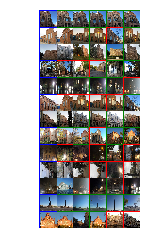

In [119]:
plt.imshow(new_image)
plt.axis('off')
plt.show()

In [21]:
new_image.save('val1.png')

In [120]:
guarda = []
accu_array =[]
for t in range(len(relnotrel)):
    numRel = 0
    accu = 0
    graphic = []
    for k in range(len(relnotrel[t])):

            # If the value is 1
            if relnotrel[t][k] == 1:

                # We add 1 to the number of correct instances
                numRel = numRel + 1

                # We calculate the precision at k (+1 because we start at 0)
                # and we accumulate it
                accu += float(numRel)/ float(k+1)
            graphic.append(float( numRel )/ float(k+1))
    accu_array.append(accu/(np.sum(relnotrel[t])*3))
    guarda.append(np.asarray(graphic))

In [122]:
(np.sum(accu_array)/13)*100

11.340008592491726

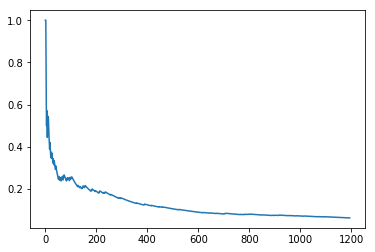

In [83]:
plt.plot(guarda[12])